In [3]:
from infrastructure.classes import Experiment, TrainParameters
from datasets import ConvexBananaDataset
from utils.plot import plot_quantile_levels_from_dataset
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="convex_banana",
    dataset_number_of_points=10**4,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="entropic_optimal_transport_quantile_regression",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=1,
        number_of_hidden_layers=1,
        epsilon=1e-5,
        activation_function_name="Softplus",
        network_type="FFNN",
        potential_to_estimate_with_neural_network="u"
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=0,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)
dataset = ConvexBananaDataset(**experiment.dataset_parameters, tensor_parameters=experiment.tensor_parameters)

model = train(experiment)
_ = model.load("../experiments_new/convex_banana_large_scale/entropic_optimal_transport_quantile_regression/u/FFNN/weights.pth")

Training: 0it [00:00, ?it/s]


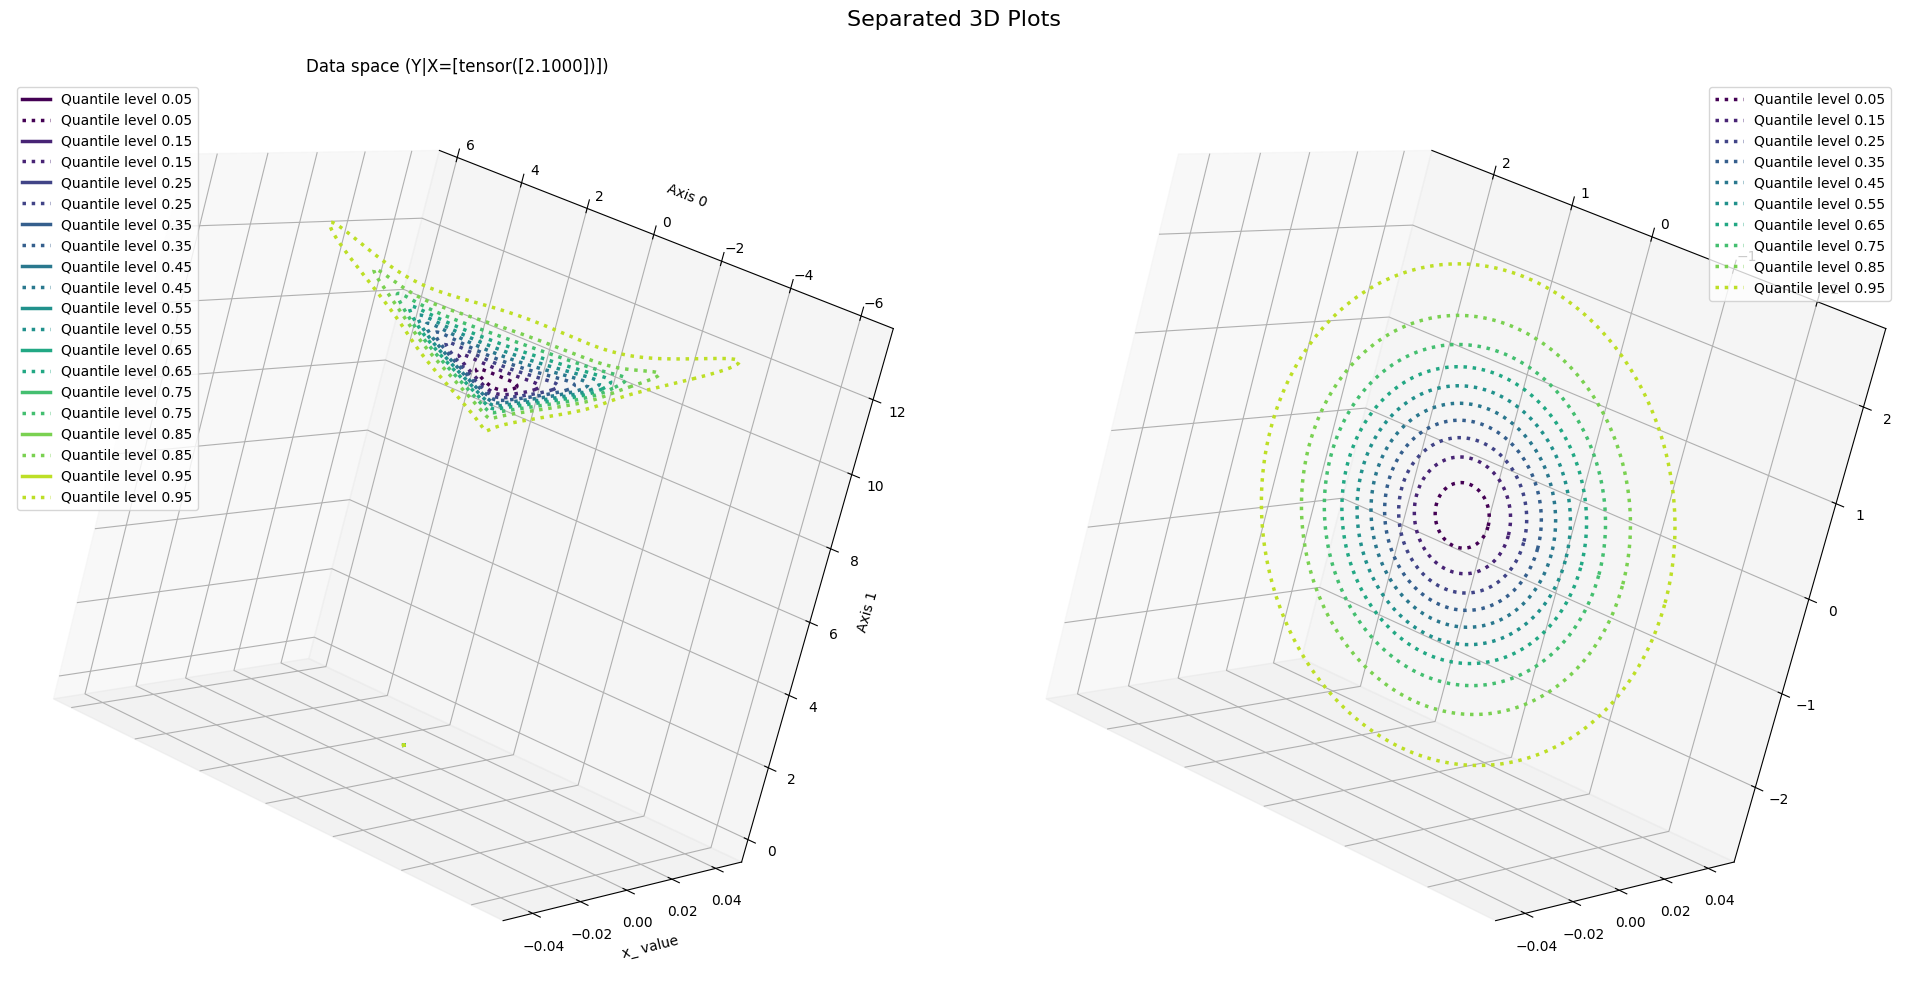

In [4]:
%matplotlib inline

plot_quantile_levels_from_dataset(
    model=model,
    dataset=dataset,
    conditional_value=torch.Tensor([[2.1]]),
    number_of_quantile_levels=10,
    tensor_parameters=experiment.tensor_parameters
)

In [1]:
from infrastructure.classes import Experiment

experiment = Experiment.load_from_path_to_experiment_file("../experiments/convex_banana_large_scale/unconstrained_optimal_transport_quantile_regression/y/SCFFNN/config.json")
experiment.path_to_metrics, experiment.path_to_weights

('../experiments/convex_banana_large_scale/unconstrained_optimal_transport_quantile_regression/y/SCFFNN/metrics.pth',
 '../experiments/convex_banana_large_scale/unconstrained_optimal_transport_quantile_regression/y/SCFFNN/weights.pth')